In [1]:
import numpy as np
import torch
import random
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
# 1) Loading all names into memory
names = open("names.txt", "r").read().split("\n")
names[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [4]:
# 2) Creating the encoder and decoder
unique_chars = ["."] + sorted(list(set("".join(names))))
stoi = {s:i for i, s in enumerate(unique_chars)}
itos = {i:s for i, s in enumerate(unique_chars)}

In [4]:
# 3) Creating the X and y sets
block_size = 3
X, y = [], []
for name in names[:5] :
  name = "..." + name + "."
  for i in range(len(name)-3) :
    ix = list(map(lambda s: stoi[s], list(name[i:i+3])))
    iy = stoi[name[i+3]]
    X.append(ix)
    y.append(iy)
X = torch.tensor(X)
y = torch.tensor(y)

In [7]:
# 4) Create the lookup table, C
no_dims = 2
C = torch.randn((len(unique_chars), no_dims)) # Shape (27, 2)
C.shape

torch.Size([27, 2])

In [8]:
# 5) Create embedding from C, for X, the sequences to be passed into the NN
embed = C[X]
embed.shape

torch.Size([32, 3, 2])

In [9]:
# 7) Creating the Weights and biases
no_inp_neurons = no_dims * block_size
W1 = torch.randn((no_inp_neurons, 100))
b1 = torch.randn(100)
W1.shape

torch.Size([6, 100])

In [10]:
# 8) We cannot simply multiply embed and W1 so we need to concatenate the last 2 dimensions of embed to get a (32, 6 matrix)
# [embed[:, 0, :], embed[:, 1, :], embed[:, 2, :]][0].shape
method1 = torch.cat(torch.unbind(embed, 1), 1).shape
method2 = embed.view(32, no_inp_neurons)
method2

tensor([[ 1.1267, -1.5898,  1.1267, -1.5898,  1.1267, -1.5898],
        [ 1.1267, -1.5898,  1.1267, -1.5898, -1.8382, -0.5771],
        [ 1.1267, -1.5898, -1.8382, -0.5771, -0.4667, -0.4263],
        [-1.8382, -0.5771, -0.4667, -0.4263, -0.4667, -0.4263],
        [-0.4667, -0.4263, -0.4667, -0.4263,  0.6081, -0.8882],
        [ 1.1267, -1.5898,  1.1267, -1.5898,  1.1267, -1.5898],
        [ 1.1267, -1.5898,  1.1267, -1.5898, -0.5614,  1.8021],
        [ 1.1267, -1.5898, -0.5614,  1.8021, -3.3045,  1.5983],
        [-0.5614,  1.8021, -3.3045,  1.5983,  2.7296,  0.4241],
        [-3.3045,  1.5983,  2.7296,  0.4241, -0.6565, -1.2876],
        [ 2.7296,  0.4241, -0.6565, -1.2876,  2.7296,  0.4241],
        [-0.6565, -1.2876,  2.7296,  0.4241,  0.6081, -0.8882],
        [ 1.1267, -1.5898,  1.1267, -1.5898,  1.1267, -1.5898],
        [ 1.1267, -1.5898,  1.1267, -1.5898,  0.6081, -0.8882],
        [ 1.1267, -1.5898,  0.6081, -0.8882, -0.6565, -1.2876],
        [ 0.6081, -0.8882, -0.6565, -1.2

In [11]:
# 9) So now we compute the heuristic h
h = torch.tanh(embed.view(embed.shape[0], no_inp_neurons) @ W1 + b1)
h

tensor([[-1.0000, -0.9771, -1.0000,  ..., -0.9992, -0.3905,  0.9595],
        [-0.9826,  0.9971, -1.0000,  ...,  0.2081, -0.9996,  0.7367],
        [-0.3790, -0.7149,  0.9559,  ..., -0.9864,  0.9709,  0.9928],
        ...,
        [ 0.9986, -0.9999,  0.9990,  ...,  0.3568,  0.9969,  0.3006],
        [-1.0000, -1.0000, -0.9970,  ..., -0.9997,  0.9995, -0.8344],
        [-1.0000, -0.9696, -1.0000,  ...,  0.0010, -0.9733,  0.5129]])

In [23]:
# 10) Calculate o/p of hidden layer
W2 = torch.randn((100, 27))
b2 = torch.randn(27)
print(h.shape, W2.shape, b2.shape)
logits = h @ W2 + b2

torch.Size([32, 100]) torch.Size([100, 27]) torch.Size([27])


In [24]:
# 10) Evaluate softmax activate
counts = logits.exp()
probs = counts/counts.sum(1, keepdim=True)
# 11) Calculate loss
loss = -probs[torch.arange(32), y].log().mean()
loss

tensor(18.5166)

In [27]:
# 12) Rewrite softmax activation and neg log likelihood loss as corss_entropy
loss = F.cross_entropy(logits, y)
loss

tensor(18.5166)

In [28]:
# 14) Rewriting everything and putting it altogether

In [25]:
block_size = 3
X, y = [], []
for name in names :
  name = "..." + name + "."
  for i in range(len(name)-3) :
    ix = list(map(lambda s: stoi[s], list(name[i:i+3])))
    iy = stoi[name[i+3]]
    X.append(ix)
    y.append(iy)
X = torch.tensor(X)
y = torch.tensor(y)

In [26]:
X.shape, y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [58]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [59]:
for p in parameters :
  p.requires_grad = True

In [60]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [63]:
lri, lossi = [], []
for i in range(10000) :
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))

  # Forward pass
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, y[ix])
  # print(loss.item())

  # backward pass
  for p in parameters :
    p.grad = None
  loss.backward()

  # lr = lrs[i]
  lr = 10**-1
  # Update parameters
  for p in parameters :
    p.data += -lr * p.grad

  # # trck stats
  # lri.append(lre[i])
  # lossi.append(loss.item())
print(f"Final loss: {loss.item()}")

Final loss: 2.068589448928833


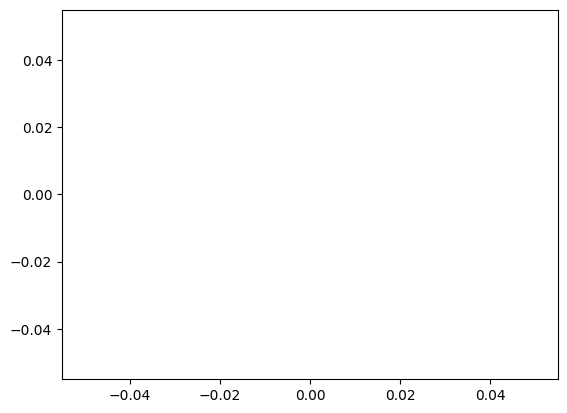

In [56]:
plt.plot(lri, lossi)

In [5]:
"""Now Repeating the same process above but with training, testing and validation sets"""

'Now Repeating the same process above but with training, testing and validation sets'

In [134]:
# Building the trainig, validation and testing sets
def build_dataset(words) :
  block_size = 3
  X, Y = [], []
  for w in words :
    context = [0] * block_size
    for ch in w + "." :
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]
  X = torch.tensor(X)
  Y = torch.tensor(Y)
  return X, Y
random.seed(42)
random.shuffle(names)
n1 = int(0.8 * len(names))
n2 = int(0.9 * len(names))

Xfull, Yfull = build_dataset(names)
Xtr, Ytr = build_dataset(names[:n1])
Xdev, Ydev = build_dataset(names[n1:n2])
Xte, Yte = build_dataset(names[n2:])
print(len(Xtr), len(Xdev), len(Xte))
print(len(Xfull))

182457 22834 22855
228146


In [135]:
print(f"Tringin shape: {Xtr.shape, Ytr.shape}")
print(f"Validation shape: {Xdev.shape, Ydev.shape}")
print(f"Testing shape: {Xte.shape, Yte.shape}")

Tringin shape: (torch.Size([182457, 3]), torch.Size([182457]))
Validation shape: (torch.Size([22834, 3]), torch.Size([22834]))
Testing shape: (torch.Size([22855, 3]), torch.Size([22855]))


In [178]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [179]:
sum(p.nelement() for p in parameters)

10281

In [180]:
for p in parameters :
  p.requires_grad = True

In [190]:
lri = []
lossi = []
steps = []
for i in range(30000) :
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (200,))

  # Forward pass
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters :
    p.grad = None
  loss.backward()

  # Update parameters
  lr = 0.01
  for p in parameters :
    p.data += -lr * p.grad

  # Track stats
  lri.append(lr)
  steps.append(i)
  lossi.append(loss.item())


print(f"Final loss: {loss.item()}")

Final loss: 2.312732219696045


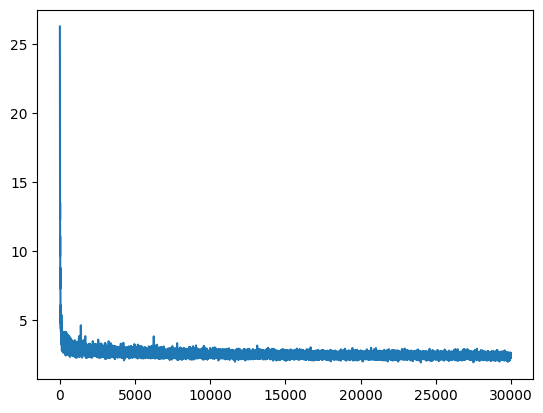

In [159]:
plt.plot(steps, lossi)

In [189]:
# Evaluating loss on validation set
embed = C[Xdev]
h = torch.tanh(embed.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2901, grad_fn=<NllLossBackward0>)

In [188]:
# Evaluating loss on training set
embed = C[Xtr]
h = torch.tanh(embed.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.2931, grad_fn=<NllLossBackward0>)

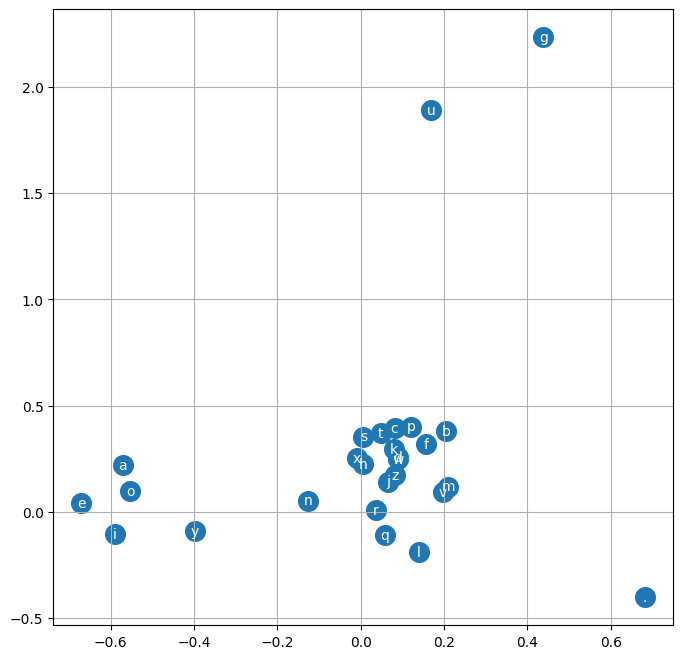

In [187]:
# Visualizing the 2 dimensional space created for our model
plt.figure(figsize=(8, 8))
plt.scatter(C[:,0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]) :
  plt.text(C[i,0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color="white")
plt.grid("minor")

In [191]:
"""Now we reduce the dimension size (could have just changed the variables
  above but wanted to keep the results)"""

'Now we reduce the dimension size (could have just changed the variables\n  above but wanted to keep the results)'

In [230]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g) # Increased to 10 dimensions
W1 = torch.randn((30, 200), generator=g) # block_size * no_dimensions = 3 * 10
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [231]:
sum(p.nelement() for p in parameters)

11897

In [232]:
for p in parameters :
  p.requires_grad = True

In [233]:
lri = []
lossi = []
steps = []

In [235]:
for i in range(30000) :
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (200,))

  # Forward pass
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters :
    p.grad = None
  loss.backward()

  # Update parameters
  lr = 0.1
  for p in parameters :
    p.data += -lr * p.grad

  # Track stats
  lri.append(lr)
  steps.append(i)
  lossi.append(loss.item())


print(f"Final loss: {loss.item()}")

Final loss: 2.230468511581421


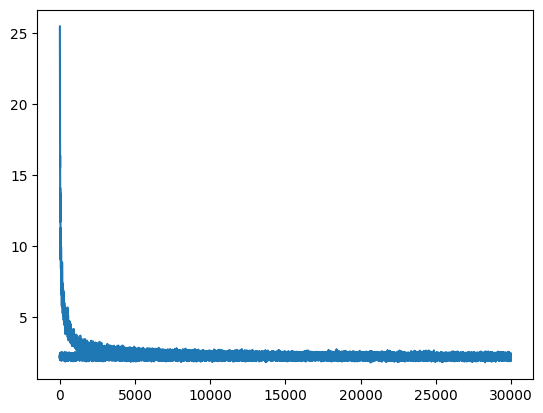

In [227]:
plt.plot(steps, lossi)

In [228]:
# Evaluating loss on training set
embed = C[Xtr]
h = torch.tanh(embed.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1329, grad_fn=<NllLossBackward0>)

In [229]:
# Evaluating loss on validation set
embed = C[Xdev]
h = torch.tanh(embed.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1547, grad_fn=<NllLossBackward0>)

In [236]:
"""Samplng from model"""

'Samplng from model'

In [238]:
g = torch.Generator().manual_seed(2147483647 + 10)
block_size = 3
for _ in range(20) :
  out = []
  context = [0] * block_size
  while True :
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0 :
      break
  print("".join([itos[i] for i in out]))

mora.
mayanniellend.
ryah.
rethan.
brerlee.
adelyn.
elin.
shi.
jenleigh.
san.
narleitziviona.
cayshadergahiriel.
kinton.
korix.
teron.
ubreyden.
jamyleyel.
yova.
mastlyen.
hal.


In [239]:
# Looks good